In [72]:
import pandas as pd
import numpy as np
import time
from datetime import timedelta,datetime
from data_generation import data_split
from features_generation import calculate_deviations
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [7]:
df1=pd.read_pickle('ncrptd.pkl')
df1.reset_index(inplace = True)

df=pd.DataFrame(columns = ['well_id', 'param_id', 'tm_time','tm_value'])
df['well_id'] = df1['wd']+2024
df['param_id'] = df1['pd']+1703
df['tm_time'] = df1['tt']+timedelta(days=10000)
df['tm_value'] = df1['tv']/1.1

df

,well_id,param_id,tm_time,tm_value
0,6110299100,220,2024-04-01 13:14:08,0.0
1,6110299100,220,2024-04-01 13:14:38,0.0
2,6110299100,220,2024-04-01 13:15:08,0.0
3,6110299100,220,2024-04-01 13:15:38,0.0
4,6110299100,220,2024-04-01 13:16:08,0.0
...,...,...,...,...
15497320,2860194100,401,2024-04-01 23:58:03,35.7
15497321,2860194100,401,2024-04-01 23:58:33,35.1
15497322,2860194100,401,2024-04-01 23:59:03,0.0
15497323,2860194100,401,2024-04-01 23:59:04,0.0


In [19]:
data_ri=pd.read_pickle('ri.pkl')
df_ri=pd.DataFrame(columns = ['well_id', 'regime_mode', 'data'])
df_ri['well_id'] = data_ri['wd']+2024
df_ri['data'] = data_ri['rd']+timedelta(days=10000)
df_ri['regime_mode'] = data_ri['regime_mode']

df_ri

,well_id,regime_mode,data
0,2270005300,ПДФ,2023-06-01
1,2270010500,ПДФ,2023-09-03
2,2270011311,ПДФ,2022-12-19
3,2270011401,ПДФ,2022-04-11
4,2270011508,ПДФ,2023-11-01
...,...,...,...
3627,9880203000,ПКВ,2024-02-18
3628,9880203600,ПДФ,2024-03-05
3629,9880203700,ПКВ,2024-03-23
3630,9880203800,АПВ,2024-03-30


In [23]:
df_ri=df_ri.query('regime_mode=="ПДФ"')

In [27]:
df_ri

,well_id,regime_mode,data
0,2270005300,ПДФ,2023-06-01
1,2270010500,ПДФ,2023-09-03
2,2270011311,ПДФ,2022-12-19
3,2270011401,ПДФ,2022-04-11
4,2270011508,ПДФ,2023-11-01
...,...,...,...
3623,9880105100,ПДФ,2023-04-03
3624,9880106000,ПДФ,2023-05-12
3626,9880200103,ПДФ,2022-10-03
3628,9880203600,ПДФ,2024-03-05


In [29]:
list_of_dfs = data_split(df,well_id_int=9880203600,param_id_list=[188,200],package_size=5000, leftcut=0)

C:\Users\Pro10\Desktop\data_generation.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_index(inplace=True)


In [31]:
result_df = calculate_deviations(list_of_dfs, dict_values = {188: [50,200], 200: [20, 55]})


In [33]:
result_df[-1][0]

,188_Value,188_Deviation from Mean,188_Deviation from Weighted Mean,188_Deviation from Q1,188_Deviation from Median,188_Deviation from Q3,188_Deviation from Previous Value,188_Deviation from Set Min Value,188_Deviation from Set Max Value,200_Value,200_Deviation from Mean,200_Deviation from Weighted Mean,200_Deviation from Q1,200_Deviation from Median,200_Deviation from Q3,200_Deviation from Previous Value,200_Deviation from Set Min Value,200_Deviation from Set Max Value
tm_time,,,,,,,,,,,,,,,,,,
2024-04-01 00:06:14,54.310000,0.094939,0.111726,0.138800,0.101750,0.039763,NaN,4.310000,-145.690000,61.0,0.175423,0.193371,0.286667,0.0,0.0,NaN,41.0,6.0
2024-04-01 00:06:15,54.309933,0.094872,0.111660,0.138733,0.101683,0.039696,-0.000067,4.309933,-145.690067,61.0,0.175423,0.193371,0.286667,0.0,0.0,0.0,41.0,6.0
2024-04-01 00:06:16,54.309867,0.094806,0.111593,0.138667,0.101617,0.039629,-0.000067,4.309867,-145.690133,61.0,0.175423,0.193371,0.286667,0.0,0.0,0.0,41.0,6.0
2024-04-01 00:06:17,54.309800,0.094739,0.111526,0.138600,0.101550,0.039563,-0.000067,4.309800,-145.690200,61.0,0.175423,0.193371,0.286667,0.0,0.0,0.0,41.0,6.0
2024-04-01 00:06:18,54.309733,0.094672,0.111460,0.138533,0.101483,0.039496,-0.000067,4.309733,-145.690267,61.0,0.175423,0.193371,0.286667,0.0,0.0,0.0,41.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-01 23:53:05,54.109933,-0.105128,-0.088340,-0.061267,-0.098317,-0.160304,0.000017,4.109933,-145.890067,61.0,0.175423,0.193371,0.286667,0.0,0.0,0.0,41.0,6.0
2024-04-01 23:53:06,54.109950,-0.105111,-0.088324,-0.061250,-0.098300,-0.160287,0.000017,4.109950,-145.890050,61.0,0.175423,0.193371,0.286667,0.0,0.0,0.0,41.0,6.0
2024-04-01 23:53:07,54.109967,-0.105094,-0.088307,-0.061233,-0.098283,-0.160271,0.000017,4.109967,-145.890033,61.0,0.175423,0.193371,0.286667,0.0,0.0,0.0,41.0,6.0


In [35]:
result_df[-1][1]

{188: {'mean': 54.215061086712765,
  'weighted_mean': 54.198273812825335,
  'Q1': 54.1712,
  'median': 54.20825,
  'Q3': 54.27023739600666,
  'std': 0.06945954134352854,
  'set_min': 50,
  'set_max': 200},
 200: {'mean': 60.824577181835174,
  'weighted_mean': 60.806628723365215,
  'Q1': 60.71333333333333,
  'median': 61.0,
  'Q3': 61.0,
  'std': 0.29370676523123984,
  'set_min': 20,
  'set_max': 55}}


Локально взвешенная регрессия (LOESS/LOWESS)  - очень долго считает


Гладкое сплайновое приближение (Smoothing Splines) - норм



In [256]:
df = pd.DataFrame()
df['188_Value'] = result_df[-1][0]['188_Value']
df

,188_Value
tm_time,
2024-04-01 00:06:14,54.310000
2024-04-01 00:06:15,54.309933
2024-04-01 00:06:16,54.309867
2024-04-01 00:06:17,54.309800
2024-04-01 00:06:18,54.309733
...,...
2024-04-01 23:53:05,54.109933
2024-04-01 23:53:06,54.109950
2024-04-01 23:53:07,54.109967


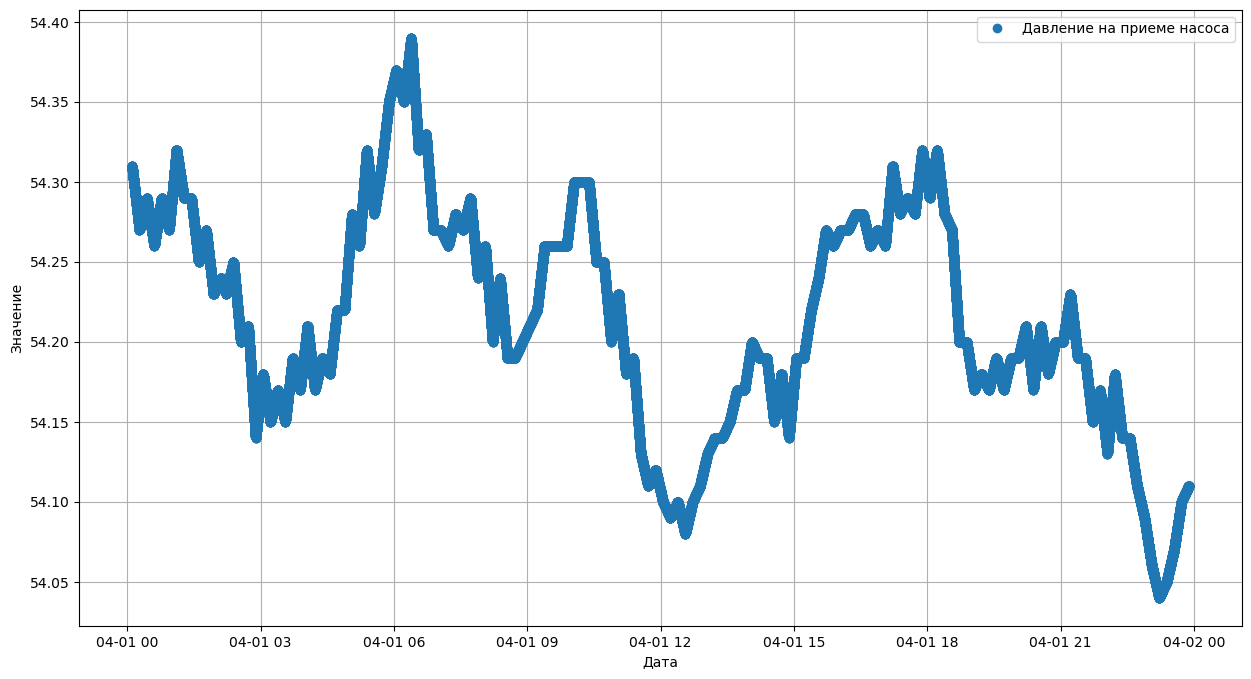

In [258]:
# Построение графика
plt.figure(figsize=(15, 8))
plt.plot(df, 'o', label='Давление на приеме насоса')


# Настройки графика

plt.xlabel('Дата')
plt.ylabel('Значение')
plt.legend()
plt.xticks() 
plt.yticks() 
plt.grid(True)

# Показ графика
plt.show()

In [260]:
# Преобразование даты в числовое значение для LOWESS
x = df.index.values
y = df['188_Value'].values
lowess = sm.nonparametric.lowess
# Применение LOWESS
lowess_model = lowess(y, x, frac=0.01)

# Создание нового DataFrame с результатом
lowess_df = pd.DataFrame({'date': df.index, 'trend': lowess_model[:,1]})

print(lowess_df)

import matplotlib.pyplot as plt



                     date      trend
0     2024-04-01 00:06:14  54.309739
1     2024-04-01 00:06:15  54.309674
2     2024-04-01 00:06:16  54.309608
3     2024-04-01 00:06:17  54.309541
4     2024-04-01 00:06:18  54.309478
...                   ...        ...
85611 2024-04-01 23:53:05  54.110151
85612 2024-04-01 23:53:06  54.110169
85613 2024-04-01 23:53:07  54.110186
85614 2024-04-01 23:53:08  54.110204
85615 2024-04-01 23:53:09  54.110220

[85616 rows x 2 columns]


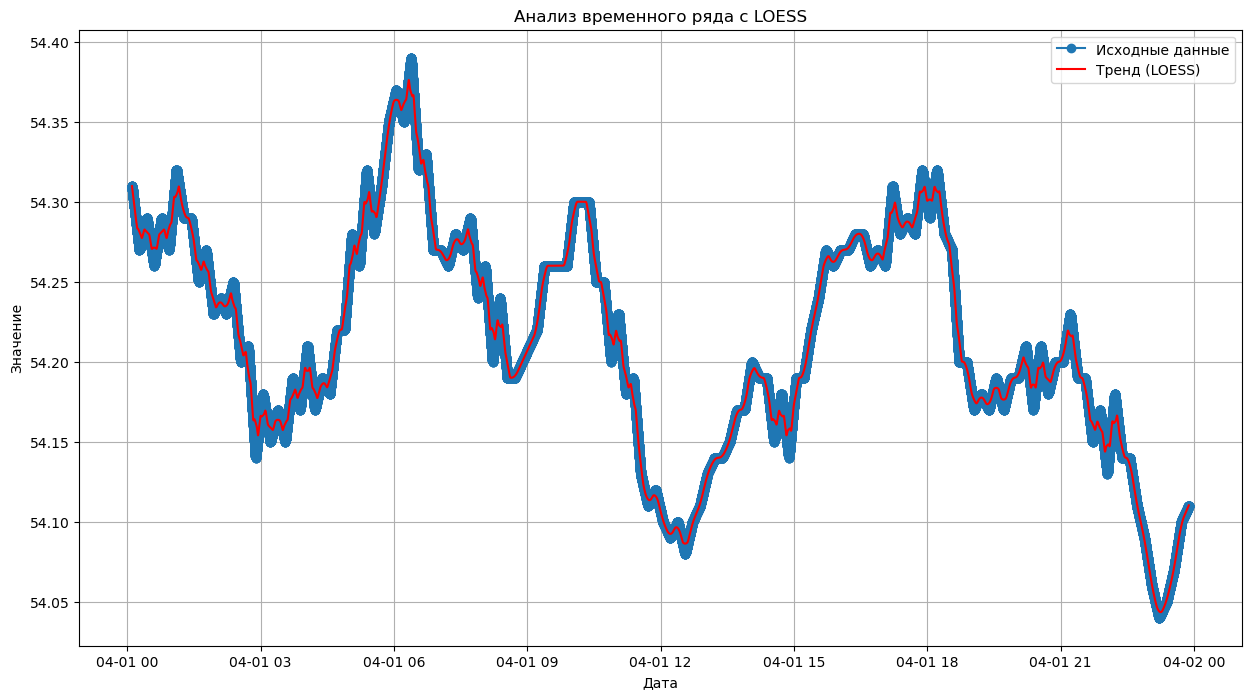

In [262]:
# Графическое отображение данных и тренда
plt.figure(figsize=(15, 8))
plt.plot(df, marker='o', label='Исходные данные')
plt.plot(lowess_df['date'], lowess_df['trend'], color='r', label='Тренд (LOESS)')
plt.title('Анализ временного ряда с LOESS')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.legend()
plt.grid(True)
plt.show()

In [264]:
x = df.index.values
y = df['188_Value'].values
lowess = sm.nonparametric.lowess
# Гладкий сплайн (smoothing splines)
spline_smooth = sc.interpolate.make_splrep(x, y,s=5)

# Генерация новых точек для построения гладкой кривой
new_y = spline_smooth(x)

# Создание нового DataFrame с результатами интерполяции
smooth_spline_df = pd.DataFrame({
        'date': x,
        'smooth_spline_trend': new_y
    })

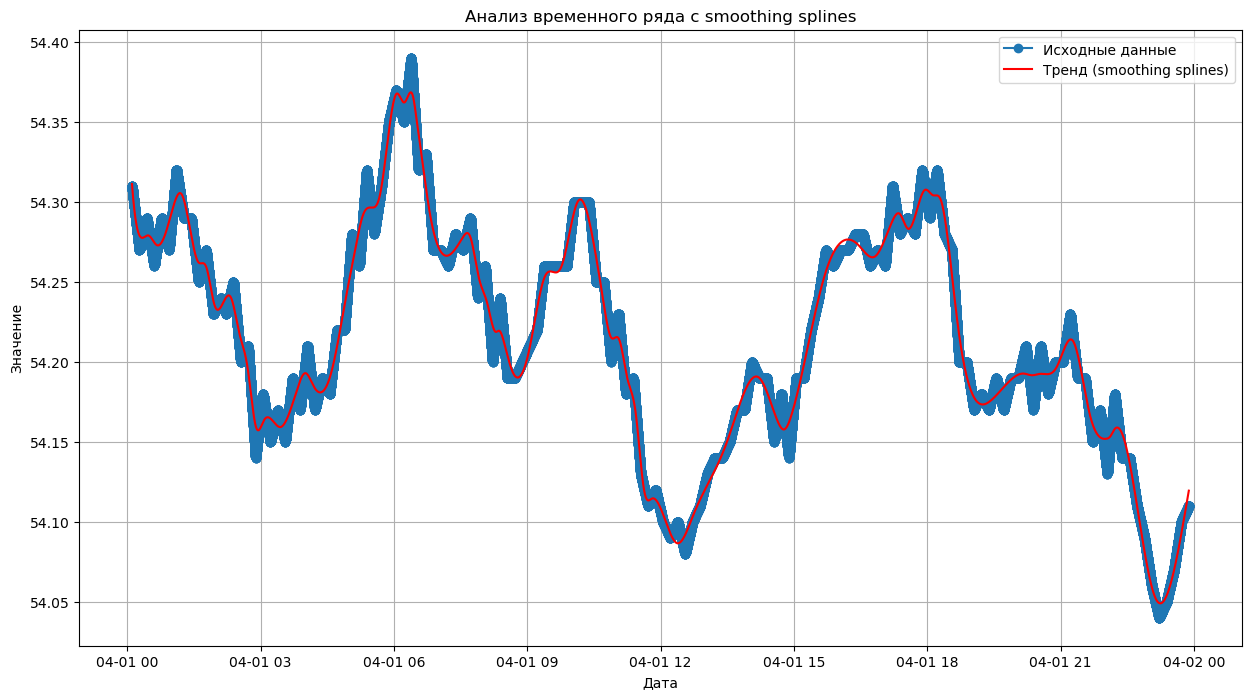

In [268]:
# Графическое отображение данных и тренда
plt.figure(figsize=(15, 8))
plt.plot(df, marker='o', label='Исходные данные')
plt.plot(smooth_spline_df['date'], smooth_spline_df['smooth_spline_trend'], color='r', label='Тренд (smoothing splines)')
plt.title('Анализ временного ряда с smoothing splines')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.legend()
plt.grid(True)
plt.show()

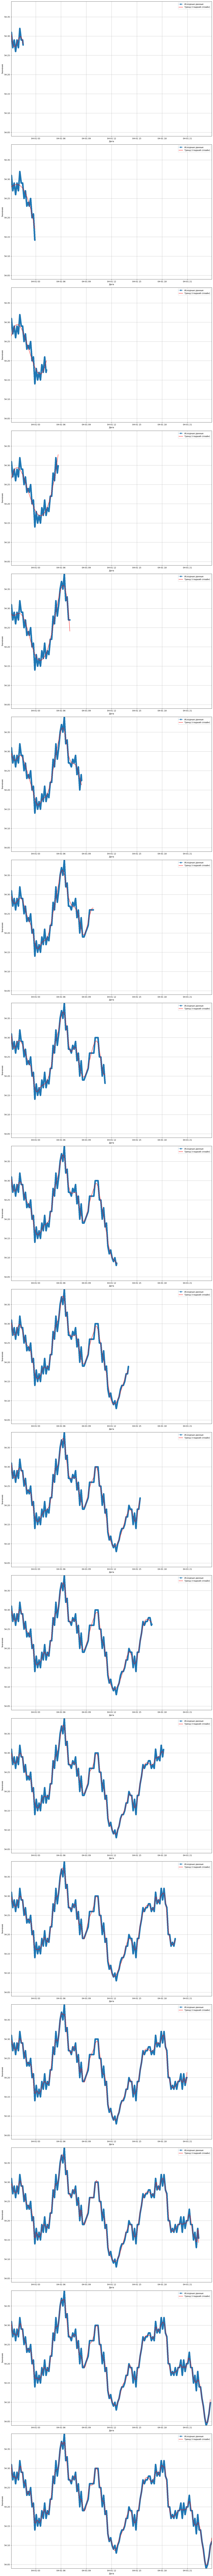

In [270]:
import scipy as sc
# Функция для построения графика с трендом
def plot_trend(x, y, ax,xlim,ylim):
    
    # Гладкий сплайн (smoothing splines)
    spline_smooth = sc.interpolate.make_splrep(x, y,s=5)

    # Генерация новых точек для построения гладкой кривой
    new_y = spline_smooth(x)

    # Создание нового DataFrame с результатами интерполяции
    smooth_spline_df = pd.DataFrame({
        'date': x,
        'smooth_spline_trend': new_y
    })
    
    # Графическое отображение данных и тренда
    
    ax.plot(df.index, df['188_Value'], marker='o', label='Исходные данные')
    ax.plot(smooth_spline_df['date'], smooth_spline_df['smooth_spline_trend'], color='r', label='Тренд (гладкий сплайн)')
    ax.set_xlabel('Дата')
    ax.set_ylabel('Значение')
    ax.legend()
    ax.grid(True)
    ax.set_xlim(*xlim)
    ax.set_ylim(*ylim)


# Построение последовательных графиков
range_max=18
fig, axes = plt.subplots(range_max, 1, figsize=(15, 10*range_max))
common_xlim = (result_df[0][0]['188_Value'].index.values[0],result_df[-1][0]['188_Value'].index.values[-1])
common_ylim = (min(result_df[-1][0]['188_Value'].values),max(result_df[-1][0]['188_Value'].values))
for i in range(range_max):
    df = pd.DataFrame()
    df['188_Value'] = result_df[i][0]['188_Value']

    x = df.index.values
    y = df['188_Value'].values

    # Построение графика
    plot_trend(x, y, axes[i],common_xlim,common_ylim)

plt.tight_layout()

plt.show()